<a href="https://colab.research.google.com/github/danielav081596/Proyecto_Integrador_Equipo5/blob/main/Avance2_Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Instituto Tecnológico y de Estudios Superiores de Monterrey**

##**Maestría en Inteligencia Artificial Aplicada**

### TC5035.10 Proyecto Integrador - "Modelación y predicción del impacto de las experiencias benevolentes en la infancia en las Condiciones de Bienestar Emocional (BCEs) en niños y adultos mexicanos"


#### Dra. Grettel Barceló Alonso - Asesor del proyecto

*Avance 1. Análisis exploratorio de datos*


**Equipo # 5**
* Karla Daniela Valenzuela A00819192
* Emmanuel Domínguez Bravo A01793683

En este primer avance realizamos un análisis exploratorio de los datos (EDA - Exploratory Data Analysis) donde examinamos los datos disponibles para encontrar patrones, detectar anomalías así como aplicar técnicas estadísticas para verificar premisas (Suresh & Usman, 2020) que nos sirvan como referencia para aplicar y justificar operaciones de preprocesamiento, necesarias para la correcta implementación de los modelos de aprendizaje automático correspondientes.

En el presente trabajo tomamos la base de datos proporcionada que consideraremos como los datos de entrenamiento, que consisten en las respuestas de salida de encuestas realizadas a un grupo de adultos que presentan ciertas patologías psicológicas. Los datos etiquetados los estaremos utilizando para entrenar modelos de clasificación multi-clase y multi-salida que aplicados a un conjunto de datos separado de encuestas realizadas a un grupo de niños, clasificar si de acuerdo con sus experiencias negativas y positivas vividas hasta ahora, presentarán un riesgo de padecer alguna de las patologías presentadas en el grupo de adultos.

In [ ]:
#!pip install pyreadstat

In [4]:
# importamos las librerías requeridas

import numpy as np
import pandas as pd
#import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 8.0 MB/s eta 0:00:00


In [6]:
! git clone https://github.com/danielav081596/Proyecto_Integrador_Equipo5.git

Cloning into 'Proyecto_Integrador_Equipo5'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 32 (delta 13), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (32/32), 4.90 MiB | 5.11 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [7]:
# Leemos los archivos con extensión .sav que se nos proporcionaron
#df_adultos, meta = pyreadstat.read_sav('/content/2.1.Base de ACES_Adultos.sav')
#df_menores, meta = pyreadstat.read_sav('/content/2.2.Base de ACES_Menores.sav')

# Escribimos los datos en un archivo .csv
#df_adultos.to_csv('ACEs Adultos.csv', index=False)

In [8]:
# Creamos un dataframe del archivo .csv

df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


<ipython-input-8-2ec3293ece57>:3: DtypeWarning: Columns (87,525,538,539,540) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


In [7]:
# La base de datos tiene 689 columnas:

df_adultos.head()

,FOLIO,FOLIO2,ID_ADULTO,TELEFONO,CORREO,BINOMIO,FILTRO,ENT,ENTIDAD,MUN,...,EDAD,INDIGENA,RELIGION,ESCOLARIDAD,NSEF,NSE5F,UPM,RURAL,PONDERADOR,AREA
0,0100108639999001-01,0100108639999001-01,1.0,4.493858e+09,yeimider1@gmail.com,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
1,0100108639999001-02,0100108639999001-02,3.0,4.495684e+09,NaN,0,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
2,0100108639999001-03,0100108639999001-03,1.0,4.494059e+09,Betomartiez89@gmail.com,1,2,1,AGUASCALIENTES,1,...,30.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
3,0100108639999001-04,0100108639999001-04,1.0,4.496682e+09,NaN,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,1.0,1.0,0100108639999,1.0,18619.783203,1.0
4,0100108639999001-05,0100108639999001-05,1.0,4.492521e+09,NaN,1,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,2.0,3.0,0100108639999,1.0,18619.783203,1.0


In [6]:
#!pip install git+https://github.com/Cauchemare/Light_FAMD.git

In [7]:
#pip install git+https://github.com/MaxHalford/Prince

In [9]:
# Renombramos columnas para facilitar su identificación

survey = {'AD_M07_50':"Seguridad alimentaria 2",'AD_M07_51':"Seguridad alimentaria 3",'AD_M07_52':"Seguridad alimentaria 4",
                     'AD_M07_53':"Seguridad alimentaria 5",'AD_M07_54':"Seguridad alimentaria 6",'AD_M07_55':"Seguridad alimentaria 7",
                     'AD_M09_95_01_1':"comportamiento_riesgo 1",'AD_M09_95_01_2':"comportamiento_riesgo 2",'AD_M09_95_01_3':"comportamiento_riesgo 3",'AD_M09_95_01_4':"comportamiento_riesgo 4",
                     'AD_M09_95_02_1':"comportamiento_riesgo 5",'AD_M09_95_02_2':"comportamiento_riesgo 6",'AD_M09_95_02_3':"comportamiento_riesgo 7",'AD_M09_95_02_4':"comportamiento_riesgo 8",
                     'AD_M09_95_03_1':"comportamiento_riesgo 9",'AD_M09_95_03_2':"comportamiento_riesgo 10",'AD_M09_95_03_3':"comportamiento_riesgo 11",'AD_M09_95_03_4':"comportamiento_riesgo 12",
                     'AD_M09_95_04_1':"comportamiento_riesgo 13",'AD_M09_95_04_2':"comportamiento_riesgo 14",'AD_M09_95_04_3':"comportamiento_riesgo 15",'AD_M09_95_04_4':"comportamiento_riesgo 16",
                     'AD_M09_95_05_1':"comportamiento_riesgo 17",'AD_M09_95_05_2':"comportamiento_riesgo 18",'AD_M09_95_05_3':"comportamiento_riesgo 19",'AD_M09_95_05_4':"comportamiento_riesgo 20",
                     'AD_M09_95_06_1':"comportamiento_riesgo 21",'AD_M09_95_06_2':"comportamiento_riesgo 22",'AD_M09_95_06_3':"comportamiento_riesgo 23",'AD_M09_95_06_4':"comportamiento_riesgo 24",
                     'AD_M09_96_01_1':"Depresión",'AD_M09_96_02_1':"Trastorno Bipolar",'AD_M09_96_03_1':"Ezquizofrenia",'AD_M09_96_04_1':"Estrés postrauma",
                     'AD_M09_96_05_1':"Anorexia Nerviosa",'AD_M09_96_06_1':"Bulimia Nerviosa",'AD_M09_96_07_1':"Ansiedad_encuesta", 'AD_M09_96_08_1':'TRASTORNO_LÍMITE_PERSONALIDAD',
                     'AD_M09_96_09_1':"Ideación Suicida",'AD_M09_96_10_1':"AUTOLESIONES NO SUICIDAS",'AD_M09_96_11_1':"DÉFICIT_ATENCIÓN_HIPERACTIVIDAD",'AD_M09_96_12_1':"Alcoholismo",
                     'AD_M09_96_13_1':"Consumo_Sustancias",'AD_M09_96_14_1':"Autismo",'AD_M09_96_15_1':"Otro Trastorno",'AD_M09_97_01':"Síntomas_trastornos_1",'AD_M09_97_02':"Síntomas_trastornos_2",
                     'AD_M09_97_03':"Síntomas_trastornos_3",'AD_M09_97_04':"Síntomas_trastornos_4",'AD_M09_97_05':"Síntomas_trastornos_5",'AD_M09_97_02':"Síntomas_trastornos_2"}

df_adultos = df_adultos.rename(columns=survey)


In [10]:
# List of columns to rename - Positive experiences
positive_att = {'AD_M10_115_01': 'Exp_pos_1','AD_M10_115_02': 'Exp_pos_2','AD_M10_115_03': 'Exp_pos_3','AD_M10_115_04': 'Exp_pos_4','AD_M10_115_05': 'Exp_pos_5',
                'AD_M10_115_06': 'Exp_pos_6','AD_M10_115_07': 'Exp_pos_7','AD_M10_115_08': 'Exp_pos_8','AD_M10_115_09': 'Exp_pos_9','AD_M10_115_10': 'Exp_pos_10',
                'AD_M10_116_01': 'Exp_pos_11','AD_M10_116_02': 'Exp_pos_12','AD_M10_116_03': 'Exp_pos_13','AD_M10_116_04': 'Exp_pos_14','AD_M10_116_05': 'Exp_pos_15',
                'AD_M10_116_06': 'Exp_pos_16','AD_M10_116_07': 'Exp_pos_17','AD_M11_117': 'Bienestar_1','AD_M11_118': 'Bienestar_2','AD_M12_120_01': 'Co_social_1',
                'AD_M12_120_02': 'Co_social_2','AD_M12_120_03': 'Co_social_3','AD_M12_120_04': 'Co_social_4','AD_M12_120_05': 'Co_social_5','AD_M12_120_06': 'Co_social_6',
                'AD_M12_120_07': 'Co_social_7','AD_M12_120_08': 'Co_social_8','AD_M12_120_09': 'Co_social_9','AD_M12_120_10': 'Co_social_10','AD_M12_120_11': 'Co_social_11',
                'AD_M12_120_12': 'Co_social_12','AD_M12_120_13': 'Co_social_13','AD_M12_120_14': 'Co_social_14','AD_M12_120_15': 'Co_social_15','AD_M12_120_16': 'Co_social_16'}

In [11]:
# Renombramos las columnas
df_adultos = df_adultos.rename(columns=positive_att)

In [11]:
# Creamos un nuevo data frame con columnas que deseamos investigar como datos de entrada

col_list = ['Exp_pos_1','Exp_pos_2','Exp_pos_3','Exp_pos_4','Exp_pos_5',
                'Exp_pos_6','Exp_pos_7','Exp_pos_8','Exp_pos_9','Exp_pos_10',
                'Exp_pos_11','Exp_pos_12','Exp_pos_13','Exp_pos_14','Exp_pos_15',
                'Exp_pos_16','Exp_pos_17','Bienestar_1','Bienestar_2','Co_social_1',
                'Co_social_2','Co_social_3','Co_social_4','Co_social_5','Co_social_6',
                'Co_social_7','Co_social_8','Co_social_9','Co_social_10','Co_social_11',
                'Co_social_12','Co_social_13','Co_social_14','Co_social_15','Co_social_16']

#df_adultos_new = pd.DataFrame(df_adultos, columns=col_list)

In [12]:
# Agregamos columnas de datos generales complementarios

col_grales = ['SEXO','EDAD','INDIGENA','Situación Laboral', 'Religiosidad', 'Estado Civil','Estudios padres', 'Ocupación','ESCOLARIDAD',
              'Rango salarial','Servicio de salud',"NIV_SEG","AREA"]

#df_adultos_new[col_grales]=df_adultos[col_grales]


In [12]:
# Renombramos las respuestas de experiencias negativas (ACEs)
ACES = {'Indicador01':'ACE1','Indicador02':'ACE2','Indicador03':'ACE3',
        'Indicador04':'ACE4','Indicador05':'ACE5','Indicador06':'ACE6',
        'Indicador07':'ACE7','Indicador08':'ACE8','Indicador09':'ACE9',
        'Indicador10':'ACE10','Indicador11':'ACE11','Indicador12':'ACE12',
        'Indicador13':'ACE13'}
df_adultos=df_adultos.rename(columns=ACES)

In [13]:
#Agregamos las métricas de experiencias positivas aplicadas por los analistas a los encuestados

metrics = ['EX_BENEVOLENTES','FORTALEZAS','FELICIDAD','PROSOCIALIDAD','SUM_TOTAL']
df_adultos[metrics]=df_adultos[metrics]
df_adultos.rename(columns={'SUM_TOTAL':'SUM_EX_POS'},inplace=True)

In [14]:
# Renombramos la columna 'NIV_SEG'
df_adultos.rename(columns={'NIV_SEG':'NIV_SEG_ALIMENTARIA'}, inplace=True)

In [16]:
# Renombramos las variables dependientes

y_train_col = {'DxPHQ9':'Depresion', 'DxGAD7':'Ansiedad','DxPCL5':'TRANSTORNO_ESTRES POSTRAUMÁTICO','Dx_SCOFF':'SOSPECHA DE ANOREXIA/BULIMIA'}


df_adultos.rename(columns=y_train_col, inplace=True)


In [17]:
#df_adultos = df_adultos.drop(columns=df_adultos.columns[df_adultos.columns.str.contains('INT_ID\$[0-9]+', case=False)])
#df_adultos = df_adultos.drop(columns=df_adultos.columns[df_adultos.columns.str.contains('OTRO\$[0-9]+', case=True)])
import re

variables_to_drop = ['ID_ADULTO_[1-7]\.0',
    'BINOMIO_[0-1]',
    'FILTRO_[1-6]',
    'ENT_[1-9]|ENT_1[1-7]',
    'ENTIDAD_.+',
    'MUN_.+',
    'MUNICIPIO_[A-Z ]+',
    'TELEFONO',
    'CORREO',
    'LOCALIDAD_[A-Z ]+'
    'FOLIO_COMP\$0[2-7]_0711200199999001-05',
    'FOLIO_COMP$01',
    'FOLIO_COMP$02', 'FOLIO_COMP$03', 'FOLIO_COMP$04', 'FOLIO_COMP$05',
    'FOLIO_COMP$06', 'FOLIO_COMP$07', 'FOLIO_COMP$08', 'FOLIO_COMP$09',
    'FOLIO_COMP$10', 'FOLIO_COMP$11', 'FOLIO_COMP$12', 'INT_ID$01',
    'INT_ID$02', 'INT_ID$03', 'INT_ID$04', 'INT_ID$05', 'INT_ID$06',
    'INT_ID$07', 'INT_ID$08', 'INT_ID$09', 'INT_ID$10', 'INT_ID$11',
    'INT_ID$12', 'OTRO$01', 'OTRO$02', 'OTRO$03', 'OTRO$04', 'OTRO$05',
    'OTRO$06', 'OTRO$07', 'OTRO$08', 'OTRO$09', 'OTRO$10', 'OTRO$11',
    'OTRO$12','FOLIO', 'FOLIO2', 'ID_ADULTO', 'BINOMIO', 'FILTRO', 'ENTIDAD',
    'MUNICIPIO', 'LOCALIDAD', 'ECUESTADOR', 'MAQUINA', 'GPS1', 'LATITUD',
    'LONGITUD','SELECCIONADOS', 'SEXO[$][0-9]*','EDAD[$][0-9]*',
    'ESPANOL[$][0-9]*','INDIGENA[$][0-9]*','LEER[$][0-9]*','DISCAPACIDAD[$][0-9]*']

# Use filter and regex to drop columns (case-insensitive)
#df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains('|'.join(map(re.escape, variables_to_drop)), case=False)]]

#for variable_pattern in variables_to_drop:
    # Use filter and regex to drop columns (case-insensitive)
 #   df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains(variable_pattern, case=False)]]


In [18]:
# Identificamos las columnas de datos generales

import re

variables_to_drop = ['ID_ADULTO_[1-7]\.0',
    'NOTA[0-9]*',
    'FILTRO_[1-6]',
    'OTRO\$[0-9]',
    'ENT',
    'ENTIDAD',
    'MUN',
    'MUNICIPIO_[A-Z ]+',
    'TELEFONO',
    'CORREO',
    'LOCALIDAD_[A-Z ]+'
    'FOLIO_COMP\$0[0-9]*',
    'INT_ID\$[0-9]*',
    'FOLIO', 'FOLIO2', 'ID_ADULTO', 'FILTRO', 'ENTIDAD',
    'MUNICIPIO', 'LOCALIDAD', 'ECUESTADOR', 'MAQUINA', 'GPS1', 'LATITUD',
    'LONGITUD','SELECCIONADOS','INT_ID', 'OTRO','FOLIO','LATITUD',
    'LONGITUD','LOC','FVIS','MZN', 'AD_M07B']

# Use filter and regex to drop columns (case-insensitive)
#df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains('|'.join(map(re.escape, variables_to_drop)), case=False)]]


for variable_pattern in variables_to_drop:
    # Use filter and regex to drop columns (case-insensitive)
    df_adultos = df_adultos[df_adultos.columns[~df_adultos.columns.str.contains(variable_pattern, case=False)]]


In [19]:
df_adultos2 = df_adultos.copy()

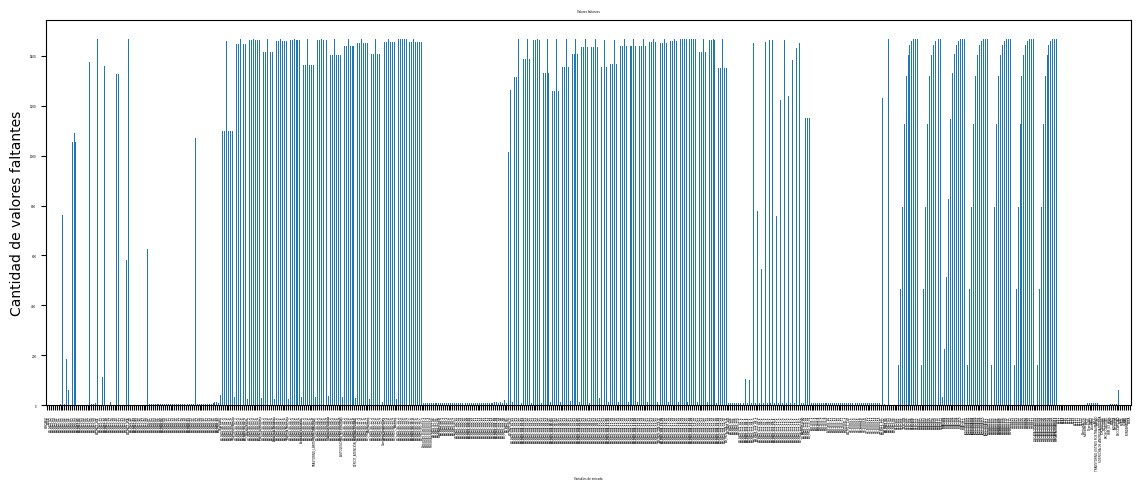

In [24]:
# Calculamos la cantidad de valores faltantes por sexo
valores_faltantes = df_adultos2.apply(lambda x: x.isnull().sum())

# Creamos una gráfica de barras con el conteo de los valores faltantes
valores_faltantes.plot(kind='bar', stacked=False,fontsize=2,rot=90,figsize=(14,5))
plt.title('Valores faltantes',fontsize=2)
plt.xlabel('Variables de entrada',fontsize=2)
plt.ylabel('Cantidad de valores faltantes',fontsize=10)
plt.show()

In [34]:
# Revisamos los % de valores faltantes por columna
faltantes = (pd.isnull(df_adultos2).sum()/df_adultos2.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes.head(100)

AD_M09_104_04_04    100.000000
AD_M09_104_01_04    100.000000
AD_M09_96_15_4      100.000000
AD_M09_104_18_05    100.000000
FNAC$12             100.000000
                       ...    
FNAC$09              99.386921
AD_M09_96_01_4       99.386921
AD_M09_96_05_5       99.318801
AD_M09_96_05_3       99.318801
INDIGENA$09          99.318801
Length: 100, dtype: float64

In [35]:
# Remove columns with more than 80% missing values
threshold = 85
columns_to_keep = faltantes[faltantes <= threshold].index
df_adultos2 = df_adultos2[columns_to_keep]

In [40]:
# Revisamos nuevamente los % de valores faltantes por columna
faltantes = (pd.isnull(df_adultos2).sum()/df_adultos2.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes.head(100)

AD_M09_111_13_2     84.400545
AD_M13_122          83.855586
AD_M09_111_11_2     83.378747
AD_M09_114_01       78.474114
AD_M09_114_03       78.474114
                      ...    
AD_M09_101_04        0.817439
AD_M08_37            0.817439
AD_M08_35            0.749319
AD_M09_104_04_01     0.749319
AD_M08_38            0.749319
Length: 100, dtype: float64

In [48]:
# Imputamos la moda para valores faltantes
for col in df_adultos2:
    mode_value = df_adultos2[col].mode()
    df_adultos2[col].fillna(mode_value, inplace=True)


In [117]:
# Definimos nuestro conjunto de datos de salida etiquetados

y = df_adultos2[['Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']]

In [135]:
# Revisamos los valores faltantes de y
faltantes = (pd.isnull(y_train).sum()/y_train.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes.head(100)

Depresion                            0.0
Ansiedad_1                           0.0
TRANSTORNO_ESTRES POSTRAUMÁTICO_1    0.0
SOSPECHA DE ANOREXIA/BULIMIA_1       0.0
dtype: float64

In [119]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance with strategy='most_frequent' (mode)
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data to fill missing values
y_train_imputed = imputer.fit_transform(y_train)

# Convert back to a Series if needed

#y_train_imputed_series = pd.Series(y_train_imputed.flatten(), index=y_train.index)

# Replace the original Series with the imputed values
y_train = y_train_imputed

In [ ]:
# Definimos nuestros conjuntos de entrenamiento, prueba y validació
X_train, X_test, y_train, y_test = train_test_split(df_adultos2, y, test_size=0.3, random_state=0)

In [50]:
# Definimos una función que sustituye los valores de cada columna con 1 cuando el valor boolean
# de la comparación de cada elemento con la moda de la columna es True y 0 cuando es False

def categorize_by_mode(column):
    mode_values = column.mode()
    if not mode_values.empty:
        mode_value = mode_values.iloc[0]
        return column.eq(mode_value).astype(int)
    else:
        return pd.Series(0, index=column.index)

In [51]:
# Aplicamos la función definida anteriormente al conjunto de entrenamiento

for col in X_train:
    # One-hot encoding para columnas binarias
    if X_train[col].nunique() == 2:
        X_train = pd.get_dummies(X_train, columns=[col], drop_first=True)
    else:
        # Aplicamos la función que creamos a cada elemento del data frame
        X_train = X_train.apply(categorize_by_mode)


In [136]:
# Aplicamos la función definida anteriormente al conjunto de entrenamiento

for col in y_train:
    # One-hot encoding para columnas binarias
    if y_train[col].nunique() == 2:
        y_train = pd.get_dummies(y_train, columns=[col], drop_first=True)
    else:
        # Aplicamos la función que creamos a cada elemento del data frame
        y_train = y_train.apply(categorize_by_mode)


In [53]:
# Por separado, hacemos lo mismo con el conjunto de prueba

for col in X_test:
    # One-hot encoding para columnas binarias
    if X_test[col].nunique() == 2:
        X_test = pd.get_dummies(X_test, columns=[col], drop_first=True)
    else:
        # Aplicamos la función que creamos a cada elemento del data frame
        X_test = X_test.apply(categorize_by_mode)


In [52]:
test = X_train.filter(like='AD_M09_111_01')
test.describe()

,AD_M09_111_01_2_1,AD_M09_111_01_1_1
count,1027.000000,1027.000000
mean,0.494645,0.849075
std,0.500215,0.358150
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [54]:
import prince

mca = prince.MCA(one_hot=False,n_components=5, random_state=42)
mca_result = mca.fit(X_train)

In [55]:
# obtain main components
main_comp_X_train = mca_result.eigenvalues_summary
main_comp_X_train

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.034,5.95%,5.95%
1,0.028,4.79%,10.74%
2,0.021,3.71%,14.45%
3,0.019,3.23%,17.68%
4,0.015,2.60%,20.29%


In [57]:
mca.plot(
    X_train,
    x_component=0,
    y_component=2,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

alt.LayerChart(...)

In [41]:
df_adultos.shape

(1468, 562)

In [58]:
contributions = mca.column_contributions_.style.format('{:.0%}')
contrib_df = pd.DataFrame(contributions.data)

In [59]:
contrib_df.to_csv('contributions_column_5comp_X_train.csv')

In [68]:
mca_xtest = mca.transform(X_test)
contributions_xtest = mca.column_contributions_.style.format('{:.0%}')
contrib_xtest = pd.DataFrame(contributions_xtest.data)

In [60]:
# Seleccionamos variables de X_train con 85% de variabilidad acumulada

# Sorting values in descending order
sorted_column =contrib_df[0].sort_values(ascending=False)

# Creating a new DataFrame with variables that make up 85% of cumulative sum
cumulative_percent_threshold = .85
cumulative_sum = 0
selected_variables = []

for variable, value in sorted_column.items():
    cumulative_sum += float(value)
    selected_variables.append(variable)

    if cumulative_sum >= cumulative_percent_threshold:
        break

X_train = X_train[selected_variables]

In [72]:
X_train.shape

(1027, 93)

In [74]:
"""Visualizamos los tipos de caracteres. A pesar de ser tipo flotante o enteros,
por la naturaleza de la información la mayoría son datos de tipo categórico."""

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 512 to 684
Data columns (total 93 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   GAD7_1                          1027 non-null   uint8
 1   INDIGENA$05_1                   1027 non-null   uint8
 2   DISCAPACIDAD$05_1               1027 non-null   uint8
 3   ESPANOL$05_1                    1027 non-null   uint8
 4   ESPANOL$04_1                    1027 non-null   uint8
 5   INDIGENA$04_1                   1027 non-null   uint8
 6   PHQ9_1                          1027 non-null   uint8
 7   AD_M09_96_01_7_1                1027 non-null   uint8
 8   LEER$04_1                       1027 non-null   uint8
 9   DISCAPACIDAD$04_1               1027 non-null   uint8
 10  AD_M09_96_01_6_1                1027 non-null   uint8
 11  SEXO$05_1                       1027 non-null   uint8
 12  AD_M09_96_01_5_1                1027 non-null   uint8
 13  AD

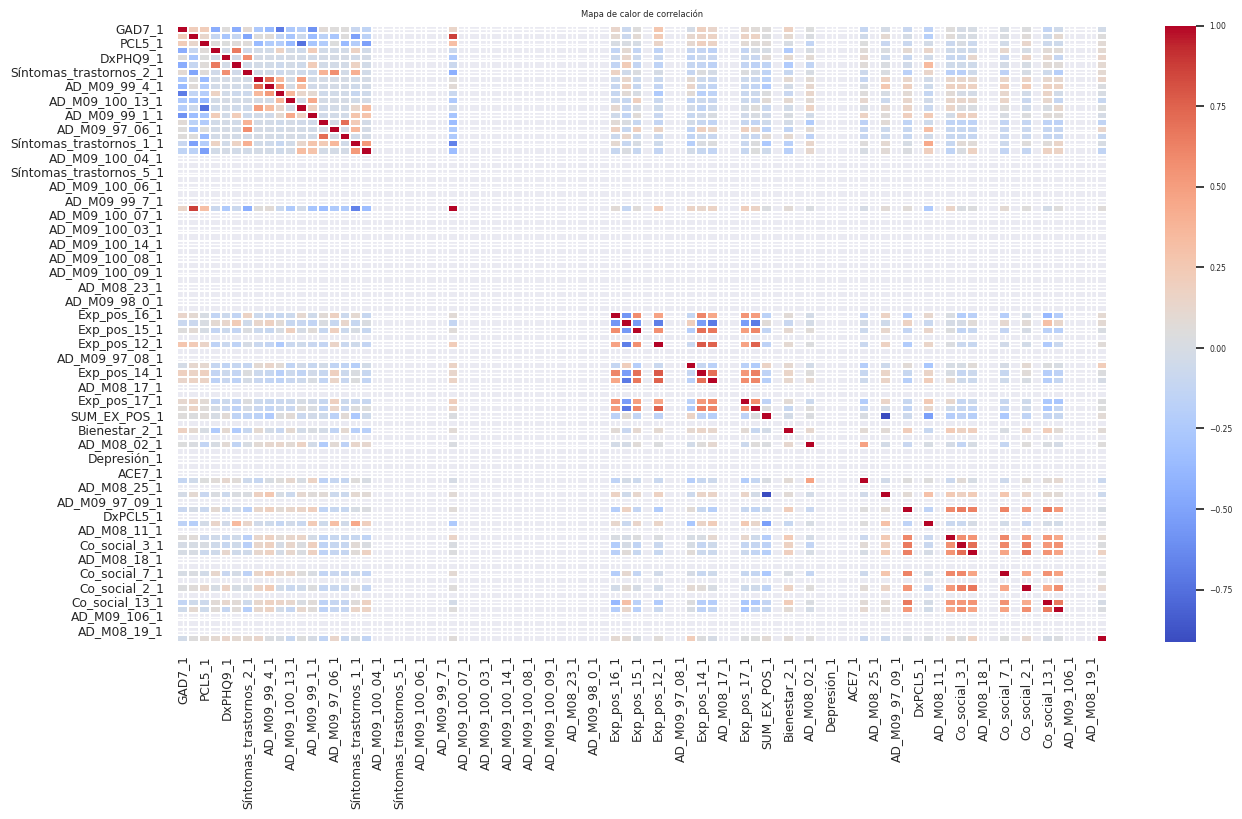

In [252]:
# Calculamos la matriz de correlación
correlation_matrix = x_train.corr(method='pearson')

# Creamos un mapa de calor de la matriz de correlación

fig, ax = plt.subplots(figsize=(15, 8))
sns.set(font_scale=0.5)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.05)
plt.title('Mapa de calor de correlación')
plt.show()


De la matriz de correlación vemos que las experiencias positivas tienen cierta correlación negativa con las experiencias adversas, sin embargo uno de los objetivos de nuestro proyecto es ponderar cuáles de las experiencias positivas tienen un mayor efecto de mitigación de las patologías etiquetadas. Así mismo, pudimos notar que entre mayor inseguridad alimentaria se tiene (NIV_SEG_ALIMENTARIA), hay una clara correlación con el trastorno de depresión. Por otro lado, inicialmente asumíamos que una mayor cohesión social (Co_social) tendría cierto beneficio para redicir las enfermedades psicológicas, pero no se puede identificar ninguna correlación claramente.

A continuación utilizamos Pandas Profiling como una herramienta automática para realizar el análisis EDA, sin embargo seleccionaremos un sub-conjunto de datos, ya que los recursos de cómputo con los que contamos en Google Colab son limitados.

In [ ]:
# probamos con un subset de datos más pequeño para correrlo en Pandas Profiling
df_adultos_new.drop(columns=['INDIGENA', 'Situación Laboral', 'Religiosidad', 'Estado Civil',
       'Estudios padres', 'Ocupación', 'ESCOLARIDAD', 'Rango salarial',
       'Servicio de salud','ACE1', 'ACE2', 'ACE3', 'ACE4', 'ACE5',
       'ACE6', 'ACE7', 'ACE8', 'ACE9', 'ACE10', 'ACE11', 'ACE12', 'ACE13',
       'ACE_mas_4', 'PuntajeACES','Co_social_1', 'Co_social_2', 'Co_social_3', 'Co_social_4',
       'Co_social_5', 'Co_social_6', 'Co_social_7', 'Co_social_8',
       'Co_social_9', 'Co_social_10', 'Co_social_11', 'Co_social_12',
       'Co_social_13', 'Co_social_14', 'Co_social_15', 'Co_social_16'],inplace=True)

In [ ]:
df_adultos_new.columns

Index(['Exp_pos_1', 'Exp_pos_2', 'Exp_pos_3', 'Exp_pos_4', 'Exp_pos_5',
       'Exp_pos_6', 'Exp_pos_7', 'Exp_pos_8', 'Exp_pos_9', 'Exp_pos_10',
       'Exp_pos_11', 'Exp_pos_12', 'Exp_pos_13', 'Exp_pos_14', 'Exp_pos_15',
       'Exp_pos_16', 'Exp_pos_17', 'Bienestar_1', 'Bienestar_2', 'SEXO',
       'EDAD', 'NIV_SEG_ALIMENTARIA', 'AREA', 'EX_BENEVOLENTES', 'FORTALEZAS',
       'FELICIDAD', 'PROSOCIALIDAD', 'SUM_EX_POS', 'Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA'],
      dtype='object')

In [246]:
# Análisis multivariable: creamos gráficas Pair Plot para un sub-conjunto
# de variables de entrada y salida:

VARS = ['Bienestar_1', 'Bienestar_2','NIV_SEG_ALIMENTARIA',
        'Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']

In [42]:
# Gráfica pair plot, vemos en la diagonal los histogramas que reflejan las
# diferentes categorías por variable.

sns.set(font_scale=3)

#sns.pairplot(df_adultos2,vars = VARS, kind="reg",height=8)
#fig, ax = plt.subplots(figsize=(20, 20))
#plt.show()

In [237]:
# Identificamos las columnas numéricas y categóricas
numeric_columns = x_train.select_dtypes(include=np.number).columns
numeric_columns


Index(['GAD7_1', 'Síntomas_trastornos_4_1', 'PCL5_1', 'AD_M09_99_3_1',
       'DxPHQ9_1', 'AD_M09_99_2_1', 'Síntomas_trastornos_2_1', 'DxGAD7_1',
       'AD_M09_99_4_1', 'AD_M09_99_6_1', 'AD_M09_100_13_1', 'AD_M09_100_12_1',
       'AD_M09_99_1_1', 'Síntomas_trastornos_3_1', 'AD_M09_97_06_1',
       'AD_M09_100_20_1', 'Síntomas_trastornos_1_1', 'AD_M09_100_11_1',
       'AD_M09_100_04_1', 'AD_M09_100_01_1', 'Síntomas_trastornos_5_1',
       'AD_M09_100_19_1', 'AD_M09_100_06_1', 'AD_M09_100_18_1',
       'AD_M09_99_7_1', 'PHQ9_1', 'AD_M09_100_07_1', 'AD_M09_100_10_1',
       'AD_M09_100_03_1', 'AD_M09_99_5_1', 'AD_M09_100_14_1',
       'AD_M09_100_05_1', 'AD_M09_100_08_1', 'AD_M09_100_15_1',
       'AD_M09_100_09_1', 'AD_M09_100_02_1', 'AD_M08_23_1', 'AD_M09_97_07_1',
       'AD_M09_98_0_1', 'AD_M09_100_17_1', 'Exp_pos_16_1', 'FORTALEZAS_1',
       'Exp_pos_15_1', 'AD_M08_15_1', 'Exp_pos_12_1', 'AD_M09_100_16_1',
       'AD_M09_97_08_1', 'Bienestar_1_1', 'Exp_pos_14_1', 'Exp_pos_13_1',


In [238]:
numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns

numeric_columns

Index(['Síntomas_trastornos_4_1', 'AD_M09_99_3_1', 'AD_M09_99_2_1',
       'Síntomas_trastornos_2_1', 'AD_M09_99_4_1', 'AD_M09_99_6_1',
       'AD_M09_100_13_1', 'AD_M09_100_12_1', 'AD_M09_99_1_1',
       'Síntomas_trastornos_3_1', 'AD_M09_97_06_1', 'AD_M09_100_20_1',
       'Síntomas_trastornos_1_1', 'AD_M09_100_11_1', 'AD_M09_100_04_1',
       'AD_M09_100_01_1', 'Síntomas_trastornos_5_1', 'AD_M09_100_19_1',
       'AD_M09_100_06_1', 'AD_M09_100_18_1', 'AD_M09_99_7_1',
       'AD_M09_100_07_1', 'AD_M09_100_10_1', 'AD_M09_100_03_1',
       'AD_M09_99_5_1', 'AD_M09_100_14_1', 'AD_M09_100_05_1',
       'AD_M09_100_08_1', 'AD_M09_100_15_1', 'AD_M09_100_09_1',
       'AD_M09_100_02_1', 'AD_M08_23_1', 'AD_M09_97_07_1', 'AD_M09_98_0_1',
       'AD_M09_100_17_1', 'Exp_pos_16_1', 'Exp_pos_15_1', 'AD_M08_15_1',
       'Exp_pos_12_1', 'AD_M09_100_16_1', 'AD_M09_97_08_1', 'Bienestar_1_1',
       'Exp_pos_14_1', 'Exp_pos_13_1', 'AD_M08_17_1', 'AD_M08_12_1',
       'Exp_pos_17_1', 'Exp_pos_11_1', '

In [239]:
# Seleccionamos las columnas categóricas

df_categorical_columns = x_train.select_dtypes(exclude=['int64', 'float64']).columns

df_categorical_columns


Index(['GAD7_1', 'PCL5_1', 'DxPHQ9_1', 'DxGAD7_1', 'PHQ9_1', 'FORTALEZAS_1',
       'SUM_EX_POS_1', 'IndicadorMas4_1', 'SCOFF_1', 'ACE7_1', 'DxPCL5_1',
       'Dx_SCOFF_1'],
      dtype='object')

In [ ]:
''' Aplicamos las transformaciones sobre variables numéricas con sesgo
en su histograma.'''

import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Lista de variables a transformar
variables_a_transformar = numeric_columns

# Crear subgráficos para todas las variables
fig, axs = plt.subplots(len(variables_a_transformar), 2, figsize=(8, len(variables_a_transformar) * 2))

# Iterar sobre la lista de variables
for i, variable in enumerate(variables_a_transformar):

    # Obtener la serie de la variable original
    original_data = x_train[variable]

    # Aplicar la transformación de Box-Cox
    transformed_data, lambda_value = boxcox(original_data + 1)  # Se suma 1 para manejar valores no positivos

    # Crear histograma para la distribución original
    axs[i, 0].hist(original_data, bins=20, color='b', alpha=0.7)
    axs[i, 0].set_title(f'Distribución original de {variable}', fontsize=8)

    # Crear histograma para la distribución transformada
    axs[i, 1].hist(transformed_data, bins=20, color='r', alpha=0.7)
    axs[i, 1].set_title(f'Distribución transformada de {variable} (Box-Cox)', fontsize=8)

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()


In [78]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [134]:
X_train, X_test, y_train, y_test = train_test_split(df_adultos2, y, test_size=0.3, random_state=0)

In [114]:
param_grid = {"max_depth": [2, 3, 4, None]}

In [141]:
tree_model = GridSearchCV(

    DecisionTreeClassifier(random_state=0),

    cv=5,

    scoring='f1_weighted',

    param_grid=param_grid,

)

In [157]:
variables_a_combinar1 = ['Depresión_1', 'Co_social_10_1']
variables_a_combinar2 = ['GAD7_1', 'Co_social_10_1']
variables_a_combinar3 = ['Ansiedad_1', 'Bienestar_1_1']

In [165]:
var_dict = {'Dep+Co_social_10_1':variables_a_combinar1,
            'GAD7_1+Co_social_10_1':variables_a_combinar2,
            'Ansiedad_1+Bienestar_1_1':variables_a_combinar3}

for i,j in var_dict.items():
  tree_model.fit(X_train[j], y_train['Depresion_1'])
  X_train[i] = tree_model.predict(X_train[j])
  X_test[i] = tree_model.predict(X_test[j])

In [168]:
new_columns = ['Dep+Co_social_10_1','GAD7_1+Co_social_10_1','GAD7_1+Co_social_10_1']

X_train[new_columns].head()

,Dep+Co_social_10_1,GAD7_1+Co_social_10_1,GAD7_1+Co_social_10_1
512,1,0,0
320,0,0,0
608,0,0,0
195,0,1,1
721,1,0,0


En general, consideramos que la información después del pre-procesamiento es de una calidad aceptable para utilizarla en modelos de aprendizaje automático, considerando que algunas columnas reflejan la valoración que hicieron los expertos en la materia sobre el diagnóstico objetivo de las patologías etiquetadas después de analizar las respuestas proporcionadas por los encuestados.

Finalmente, debido a que se trata de datos categóricos en su mayoría, no consideramos que se tengan que normalizar, ya que necesitamos que cada categoría se conserve con su magnitud original para entender la importancia de cada variable en el resultado final.


**Referencias:**

Mukhiya, S. K., & Ahmed, U. (2020). *Hands-On Exploratory Data Analysis with Python*. Packt Publishing.

Sangani, R. (2021). *Dealing with features that have high cardinality*. Towards Data Science. https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b